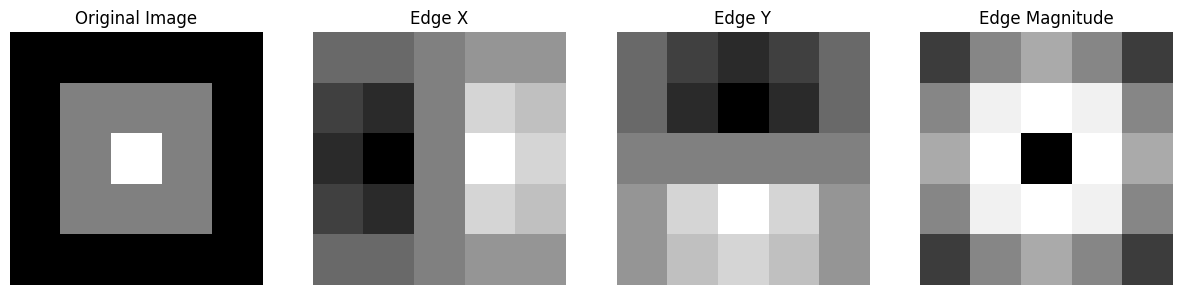

In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# 5x5 이미지 생성 (간단한 예제)
image = np.array([[10, 10, 10, 10, 10],
                  [10, 50, 50, 50, 10],
                  [10, 50, 90, 50, 10],
                  [10, 50, 50, 50, 10],
                  [10, 10, 10, 10, 10]])

# 소벨 필터 (엣지 검출)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# 컨볼루션 연산
edge_x = ndimage.convolve(image, sobel_x)
edge_y = ndimage.convolve(image, sobel_y)

# 결과 이미지 (엣지 크기 계산)
edge_magnitude = np.hypot(edge_x, edge_y)

# 결과 시각화
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(edge_x, cmap='gray')
ax[1].set_title('Edge X')

ax[2].imshow(edge_y, cmap='gray')
ax[2].set_title('Edge Y')

ax[3].imshow(edge_magnitude, cmap='gray')
ax[3].set_title('Edge Magnitude')

for a in ax:
    a.axis('off')

plt.show()

In [2]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# ImageNet 가중치를 사용하여 VGG16 모델을 로드 (최상위 레이어 제외)
model = VGG16(weights='imagenet', include_top=False)

# 이미지 로드 및 전처리
img_path = 'Image.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# VGG16 모델을 사용하여 특징 추출
features = model.predict(x)
print(features.shape)

# 특징 시각화 함수 정의
def visualize_features(features):
    num_filters = features.shape[-1]  # 필터 수
    size = features.shape[1]  # 특징 맵의 크기

    # 서브플롯 그리드 생성
    n_cols = 8  # 그리드의 열 수
    n_rows = num_filters // n_cols  # 그리드의 행 수

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(50, 50))
    
    for i in range(n_rows):
        for j in range(n_cols):
            ax = axes[i, j]
            ax.imshow(features[0, :, :, i * n_cols + j], cmap='viridis')  # 'viridis' 컬러맵 사용
            ax.axis('off')  # 축 숨김

    plt.show()

# 특징 시각화 함수 호출
visualize_features(features)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'image.jpg'

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8934 - loss: 0.3330 - val_accuracy: 0.9853 - val_loss: 0.0425
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9904 - val_loss: 0.0317
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9899 - val_loss: 0.0299
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9897 - val_loss: 0.0326
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9922 - val_loss: 0.0285


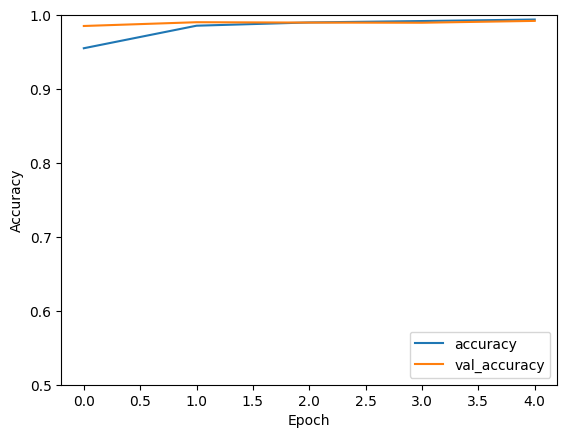

313/313 - 1s - 3ms/step - accuracy: 0.9922 - loss: 0.0285
Test accuracy: 0.9922000169754028


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# CNN 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 분류기를 위한 Dense 레이어 추가
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# 훈련 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# 테스트 데이터에 대한 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)